# 💾 📊 CIFSC Data - Treatment & Analysis 📊 💾

In [1]:
import pandas as pd

myfile = ("CIFSC Flows - 2016-2023 - EB.xlsx")
CIFSC_Data = pd.read_excel(myfile, sheet_name="CIFSC flows")
CIFSC_Data.head()

CIFSC_Data = CIFSC_Data.drop(columns= ["Fund Code", "Fund Code", "FundNumber", "FundID&Month"])
CIFSC_Data = CIFSC_Data.drop(columns= ["Net Flows"])
CIFSC_Data.head()


,Month of Date,Year of Date,Month Number,ETF,Sponsor,Sponsor Category,CIFSC,Fund Name,Net Assets,Gross Sales,Redemptions
0,January 2016,2016,1,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,183094000.0,937000.0,2397000.0
1,February 2016,2016,2,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,172025000.0,812000.0,1825000.0
2,March 2016,2016,3,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,172097000.0,604000.0,1880000.0
3,April 2016,2016,4,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,168156000.0,273310.0,1843800.0
4,May 2016,2016,5,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,177464000.0,516000.0,1638000.0


In [2]:
# 2024 data import and manupulation

myfile2024 = ("Data Request 20241122.xlsx")
CIFSC_Data2024 = pd.read_excel(myfile2024)

# 2024 rename columns
CIFSC_Data2024 = CIFSC_Data2024.rename(columns = {"Year of Date": "Month Number","Month Number" : "Year of Date"})
CIFSC_Data2024.head()

# 2024 drop and reorder columns
CIFSC_Data2024 = CIFSC_Data2024.drop(columns= ["Boutique"])
CIFSC_Data2024.head()
new_order2024 = ["Month of Date",	"Year of Date", "Month Number", "ETF", "Sponsor", "Sponsor Category", "CIFSC","Fund Name", "Net Assets",	"Gross Sales",	"Redemptions"]
CIFSC_Data2024 = CIFSC_Data2024[new_order2024]
CIFSC_Data2024["Month Number"] = CIFSC_Data2024["Month Number"] + 36
CIFSC_Data2024.head()

,Month of Date,Year of Date,Month Number,ETF,Sponsor,Sponsor Category,CIFSC,Fund Name,Net Assets,Gross Sales,Redemptions
0,January 2019,2019,37,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,210178000.0,1206260.0,1724230.0
1,February 2019,2019,38,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,227407000.0,1998260.0,1914500.0
2,March 2019,2019,39,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,231919000.0,2316180.0,1757140.0
3,April 2019,2019,40,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,245275000.0,2124980.0,2991600.0
4,May 2019,2019,41,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,238259000.0,2054550.0,3679970.0


In [3]:
import duckdb

# Register your Pandas DataFrame as a DuckDB table
duckdb.register("RequestDataOnly2024", CIFSC_Data2024)

query = """
    SELECT * 
    FROM RequestDataOnly2024
    WHERE "Year of Date" >=2024;
"""

# Execute the query and convert the result to a Pandas DataFrame.
RequestDataOnly2024 = duckdb.query(query).to_df()
RequestDataOnly2024.head()

,Month of Date,Year of Date,Month Number,ETF,Sponsor,Sponsor Category,CIFSC,Fund Name,Net Assets,Gross Sales,Redemptions
0,January 2024,2024,97,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,399782920.0,1893540.0,4577660.0
1,February 2024,2024,98,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,444585750.0,2376640.0,5526910.0
2,March 2024,2024,99,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,458475740.0,2572590.0,5769380.0
3,April 2024,2024,100,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,442917460.0,2040200.0,10134190.0
4,May 2024,2024,101,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,459511520.0,8147350.0,5955020.0


In [4]:
duckdb.register("CIFSC_Data", CIFSC_Data)
duckdb.register("RequestDataOnly2024", RequestDataOnly2024)

query = """
Select * FROM CIFSC_Data
UNION ALL
SELECT * FROM RequestDataOnly2024;
"""

mergedDF = duckdb.query(query).to_df()
print(mergedDF)

         Month of Date  Year of Date  Month Number ETF              Sponsor  \
0         January 2016          2016             1   N                  AGF   
1        February 2016          2016             2   N                  AGF   
2           March 2016          2016             3   N                  AGF   
3           April 2016          2016             4   N                  AGF   
4             May 2016          2016             5   N                  AGF   
...                ...           ...           ...  ..                  ...   
456405  September 2024          2024           105   N                   CI   
456406  September 2024          2024           105   N         Evolve Funds   
456407  September 2024          2024           105   N  Guardian Capital LP   
456408  September 2024          2024           105   N                   IG   
456409  September 2024          2024           105   N            Mackenzie   

       Sponsor Category                            

In [5]:
mergedDF.to_csv("merged.csv")

In [10]:
mergedDF.head()
mergedDF.describe()

,Year of Date,Month Number,Net Assets,Gross Sales,Redemptions
count,456410.000000,456410.000000,4.564100e+05,4.564100e+05,4.564100e+05
mean,2020.097518,55.550930,4.425049e+08,7.991295e+06,6.981125e+06
std,2.524060,30.252452,1.520302e+09,4.223244e+07,3.741186e+07
min,2016.000000,1.000000,-1.214914e+07,-1.396650e+08,-1.800140e+09
25%,2018.000000,30.000000,1.526072e+07,0.000000e+00,0.000000e+00
50%,2020.000000,57.000000,7.826200e+07,6.230000e+05,7.850000e+05
75%,2022.000000,82.000000,3.292662e+08,3.964065e+06,4.129000e+06
max,2024.000000,105.000000,5.726377e+10,4.197173e+09,4.013679e+09


In [7]:
import duckdb

# Assuming your original dataframe is called df
duckdb.register("my_Complete_table", CIFSC_Data)

query = """
SELECT 
  "Month Number", 
  CIFSC,
  SUM("Net Assets") AS total_net_assets,
  SUM("Gross Sales") AS total_gross_sales,
  SUM("Redemptions") AS total_redemptions,
  SUM("Net Flows") AS total_net_flows
FROM my_Complete_table
GROUP BY "Month Number", CIFSC;
"""

C = duckdb.query(query).to_df()
print(result_df)
result_df.head()

duckdb.register("my_CompleteOrdered_table", result_df)

query = """
SELECT *
FROM my_CompleteOrdered_table
ORDER BY CIFSC, "Month Number";
"""
resultOrdered_df = duckdb.query(query).to_df()
print(resultOrdered_df)
resultOrdered_df.head()



BinderException: Binder Error: Referenced column "Net Flows" not found in FROM clause!
Candidate bindings: "Net Assets", "Redemptions", "Year of Date"

In [ ]:
import duckdb

# Register your Pandas DataFrame as a DuckDB table
duckdb.register("my_Normalizedtable", resultOrdered_df)

query = """
SELECT 
  "Month Number", 
  CIFSC, 
  total_net_assets,
  total_gross_sales,
  total_redemptions,
  total_net_flows,
  total_net_assets / FIRST_VALUE(total_net_assets) OVER (PARTITION BY CIFSC ORDER BY "Month Number") AS normalized_value
FROM my_Normalizedtable;
"""

# Execute the query and convert the result to a Pandas DataFrame.
Normalizedtable = duckdb.query(query).to_df()
Normalizedtable.head()


NameError: name 'resultOrdered_df' is not defined

In [ ]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

# Assuming your DataFrame is already loaded as df
# df = pd.read_csv('your_data.csv')  # or however you load it

plt.figure(figsize=(10, 6))
sns.lineplot(data=Normalizedtable, x='Month Number', y='normalized_value', hue='CIFSC', marker='o')
plt.title('Evolution of Normalized Value Over Months by CIFSC')
plt.xlabel('Month Number')
plt.ylabel('Normalized Value')
plt.legend(title='CIFSC')
plt.show()

NameError: name 'Normalizedtable' is not defined

<Figure size 1000x600 with 0 Axes>

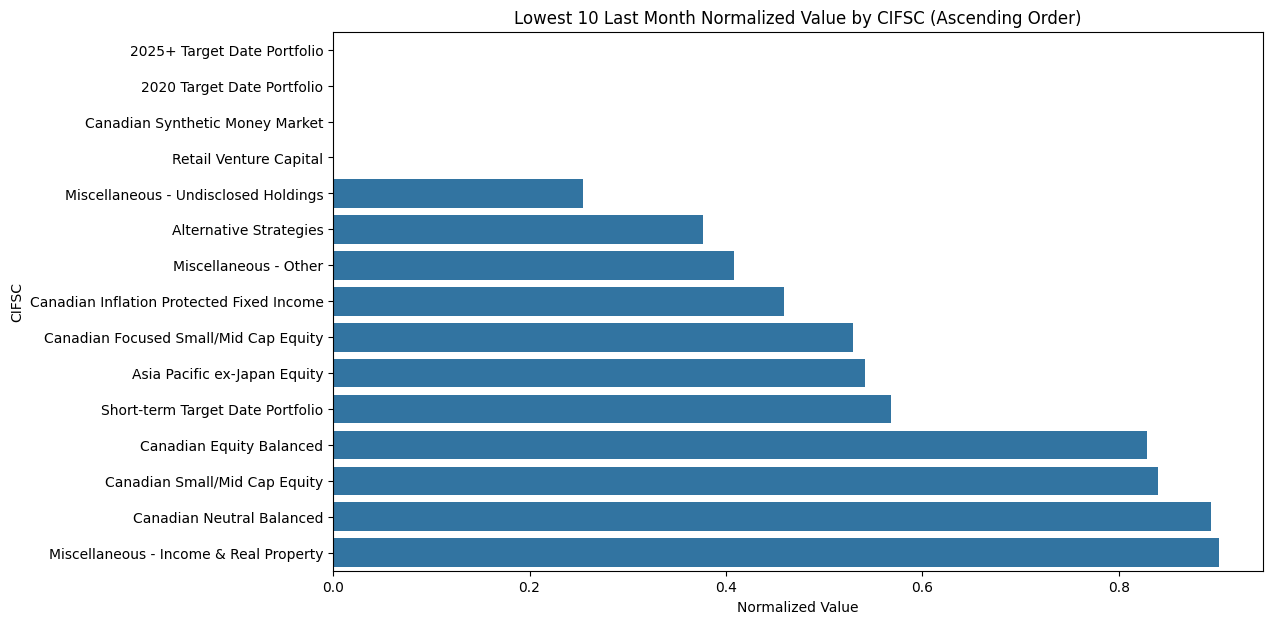

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is already loaded as df

# Step 1: Sort the DataFrame by 'Month Number' to ensure the latest month is last for each CIFSC
df_sorted = Normalizedtable.sort_values("Month Number")

# Step 2: Extract the last month's data for each CIFSC
last_month = df_sorted.groupby("CIFSC").tail(1)

# Step 3: Sort the extracted data by normalized_value in ascending order
last_month_sorted = last_month.sort_values("normalized_value")

# Step 4: Select the lowest 10 values
lowest_15 = last_month_sorted.head(15)

# Step 5: Create a horizontal bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=lowest_15, x="normalized_value", y="CIFSC", order=lowest_15["CIFSC"])
plt.title("Lowest 10 Last Month Normalized Value by CIFSC (Ascending Order)")
plt.xlabel("Normalized Value")
plt.ylabel("CIFSC")
plt.show()


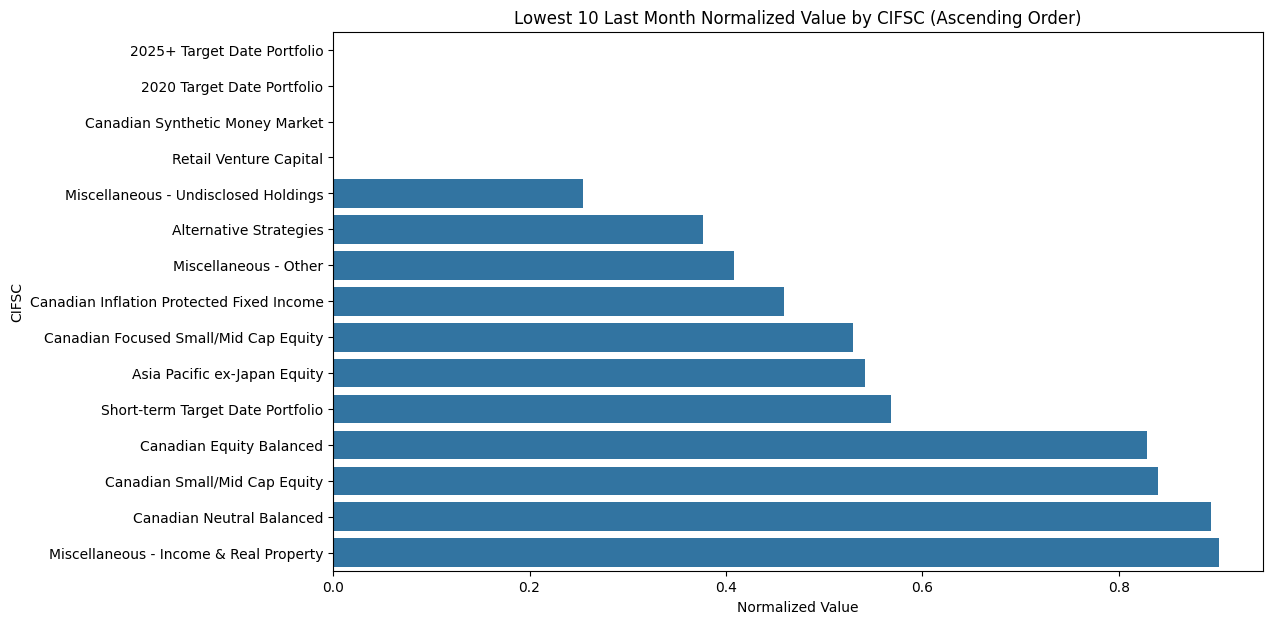

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is already loaded as df

# Step 1: Sort the DataFrame by 'Month Number' to ensure the latest month is last for each CIFSC
df_sorted = Normalizedtable.sort_values("Month Number")

# Step 2: Extract the last month's data for each CIFSC
last_month = df_sorted.groupby("CIFSC").tail(1)

# Step 3: Sort the extracted data by normalized_value in ascending order
last_month_sorted = last_month.sort_values("normalized_value")

# Step 4: Select the lowest 10 values
lowest_15 = last_month_sorted.head(15)

# Step 5: Create a horizontal bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=lowest_15, x="normalized_value", y="CIFSC", order=lowest_15["CIFSC"])
plt.title("Lowest 10 Last Month Normalized Value by CIFSC (Ascending Order)")
plt.xlabel("Normalized Value")
plt.ylabel("CIFSC")
plt.show()

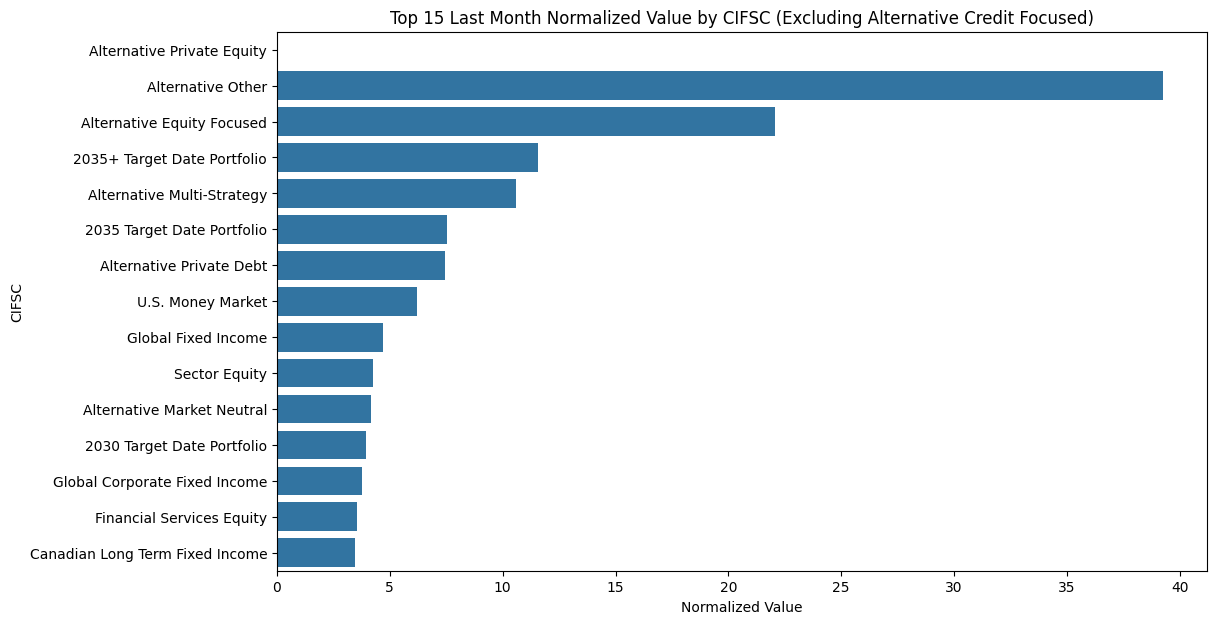

In [ ]:
# Assuming your DataFrame is already loaded as df

# Step 1: Sort by 'Month Number' to ensure the latest month is last for each CIFSC
df_sorted = Normalizedtable.sort_values("Month Number")

# Step 2: Extract the last month's data for each CIFSC
last_month = df_sorted.groupby("CIFSC").tail(1)

# Step 3: Exclude the specified CIFSC (wrap the value in quotes)
excluded_cifsc = 'Alternative Credit Focused'
last_month_filtered = last_month[last_month["CIFSC"] != excluded_cifsc]

# Step 4: Sort by normalized_value in descending order and select the top 15
last_month_sorted = last_month_filtered.sort_values("normalized_value", ascending=False)
top_15 = last_month_sorted.head(15)

# Step 5: Create a horizontal bar plot for the top 15 values
plt.figure(figsize=(12, 7))
sns.barplot(data=top_15, x="normalized_value", y="CIFSC", order=top_15["CIFSC"])
plt.title(f"Top 15 Last Month Normalized Value by CIFSC (Excluding {excluded_cifsc})")
plt.xlabel("Normalized Value")
plt.ylabel("CIFSC")
plt.show()


In [ ]:
Normalizedtable.head()

,Month Number,CIFSC,total_net_assets,total_gross_sales,total_redemptions,total_net_flows,normalized_value
0,59,Alternative Private Equity,0.0,0.0,0.0,0.0,NaN
1,60,Alternative Private Equity,155000.0,156000.0,0.0,156000.0,inf
2,61,Alternative Private Equity,158000.0,0.0,0.0,0.0,inf
3,62,Alternative Private Equity,302000.0,103000.0,0.0,135000.0,inf
4,63,Alternative Private Equity,561000.0,237000.0,0.0,243000.0,inf


In [ ]:
import duckdb

# Register your Pandas DataFrame as a DuckDB table
duckdb.register("my_totalFlowTablebyCISFC", Normalizedtable)

query = """
SELECT 
  *,
  total_gross_sales + total_redemptions AS Total_Flow
FROM my_totalFlowTablebyCISFC;
"""

# Execute the query and convert the result to a Pandas DataFrame.
totalFlowTablebyCISFC = duckdb.query(query).to_df()
print(totalFlowTablebyCISFC.head())


   Month Number                       CIFSC  total_net_assets  \
0            59  Alternative Private Equity               0.0   
1            60  Alternative Private Equity          155000.0   
2            61  Alternative Private Equity          158000.0   
3            62  Alternative Private Equity          302000.0   
4            63  Alternative Private Equity          561000.0   

   total_gross_sales  total_redemptions  total_net_flows  normalized_value  \
0                0.0                0.0              0.0               NaN   
1           156000.0                0.0         156000.0               inf   
2                0.0                0.0              0.0               inf   
3           103000.0                0.0         135000.0               inf   
4           237000.0                0.0         243000.0               inf   

   Total_Flow  
0         0.0  
1    156000.0  
2         0.0  
3    103000.0  
4    237000.0  


In [ ]:
import duckdb

# Register your Pandas DataFrame as a DuckDB table
duckdb.register("my_totalFlowTablebyCISFC_by_month", totalFlowTablebyCISFC)

query = """
SELECT 
  "Month Number",
  SUM(total_net_assets) AS total_net_assets_by_month,
  SUM(total_gross_sales) AS total_gross_sales_by_month,
  SUM(total_redemptions) AS total_redemption_by_month,  
  SUM(total_net_flows) AS total_net_flows_by_month,
FROM my_totalFlowTablebyCISFC_by_month
GROUP BY "Month Number"
ORDER BY "Month Number" ASC;
"""

# Execute the query and convert the result to a Pandas DataFrame.
totalFlowTablebyMonth = duckdb.query(query).to_df()
totalFlowTablebyMonth.head(50)

,Month Number,total_net_assets_by_month,total_gross_sales_by_month,total_redemption_by_month,total_net_flows_by_month
0,1,1.297489e+12,2.357222e+10,2.345460e+10,5.359839e+08
1,2,1.287248e+12,2.741931e+10,1.953158e+10,8.328863e+09
2,3,1.330928e+12,2.885520e+10,2.094576e+10,8.120727e+09
3,4,1.337482e+12,2.214682e+10,1.998235e+10,2.343848e+09
4,5,1.371084e+12,2.333194e+10,1.917179e+10,4.317881e+09
5,6,1.371878e+12,2.541388e+10,2.142524e+10,4.097690e+09
6,7,1.411940e+12,2.085417e+10,1.805915e+10,2.876456e+09
7,8,1.422827e+12,2.174713e+10,1.777398e+10,4.436291e+09
8,9,1.429645e+12,2.072751e+10,1.954887e+10,1.109369e+09
9,10,1.429485e+12,2.180328e+10,1.873637e+10,3.046240e+09


In [ ]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install statsmodels


In [ ]:
!pip install pandas_datareader


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm  # For regression analysis


In [ ]:
import yfinance as yf
import pandas as pd

# Download daily VIX data from Yahoo Finance (ticker may be '^VIX' if needed)
vix_df = yf.download("aapl", start="2016-01-01", end="2023-12-31", interval="1d", progress=False)
vix_df.reset_index(inplace=True)

# Keep only the columns we need: Date and Close (renamed to VIX)
vix_df = vix_df[['Date', 'Close']]
vix_df.rename(columns={'Close': 'VIX'}, inplace=True)

print(vix_df.head())




1 Failed download:
['AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


Empty DataFrame
Columns: [Date, VIX]
Index: []


C:\Users\Bernier\AppData\Local\Temp\ipykernel_20728\1871711253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vix_df.rename(columns={'Close': 'VIX'}, inplace=True)


In [ ]:
# Merge the VIX data with your existing table on "Month Number"
merged_df = pd.merge(df, vix_df, on="Month Number", how="left")

print(merged_df.head())


NameError: name 'df' is not defined

In [ ]:
# Prepare the independent variable (VIX) and dependent variable (total_gross_sales_by_month)
X = merged_df['VIX']
Y = merged_df['total_gross_sales_by_month']

# Add a constant term for the intercept in the regression model
X = sm.add_constant(X)

# Fit an OLS regression model
model = sm.OLS(Y, X).fit()

print(model.summary())


NameError: name 'merged_df' is not defined

In [ ]:
# Compute correlation matrix for VIX and your three columns
cols = ['VIX', 'total_gross_sales_by_month', 'total_redemption_by_month', 'total_net_flows_by_month']
correlation_matrix = merged_df[cols].corr()
print(correlation_matrix)


NameError: name 'merged_df' is not defined